# Task
Data Understanding and Preprocessing
Exploratory Data Analysis (EDA) is essential to understand the structure and characteristics of the dataset. Before performing EDA, the following preprocessing steps were undertaken:
•	Handling Missing Values: Some columns, such as STATUS and SYMBOL, had missing data. Since SYMBOL had all missing values, it was dropped from the dataset. The VALUE column, containing production values, was converted to a numerical format.
•	Outlier Detection: Box plots and scatter plots were used to identify and handle potential outliers in production values.


Here is all the data you need:
"Credit card clients data"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To load the data, we begin by mounting Google Drive, as the dataset is stored there. The following code establishes a connection to the drive and grants access to the necessary files.

Alternatively, if your input data is located elsewhere, you can modify the code accordingly to accommodate the data's location.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Gathering and Exploratory Data Analysis** (EDA)

In this section, we begin by gathering the dataset and performing an initial exploration to understand its structure, distribution, and any potential patterns. This will involve inspecting the dataset for missing values, outliers, and summary statistics, as well as visualizing the data to uncover any underlying relationships. Proper exploratory data analysis is essential for preparing the data for further modeling and ensuring we capture the key features that influence the target variable.

In [ ]:
path='/content/drive/MyDrive/projects/amrik/default of credit card clients.xls'

df=pd.read_excel(path)

In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


As the first column is of no use and the current data have first column as the header so we can change it

In [ ]:
df=df.drop('Unnamed: 0', axis=1)

df.columns=df.iloc[0]

df=df[1:]


In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(30000, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

In [ ]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


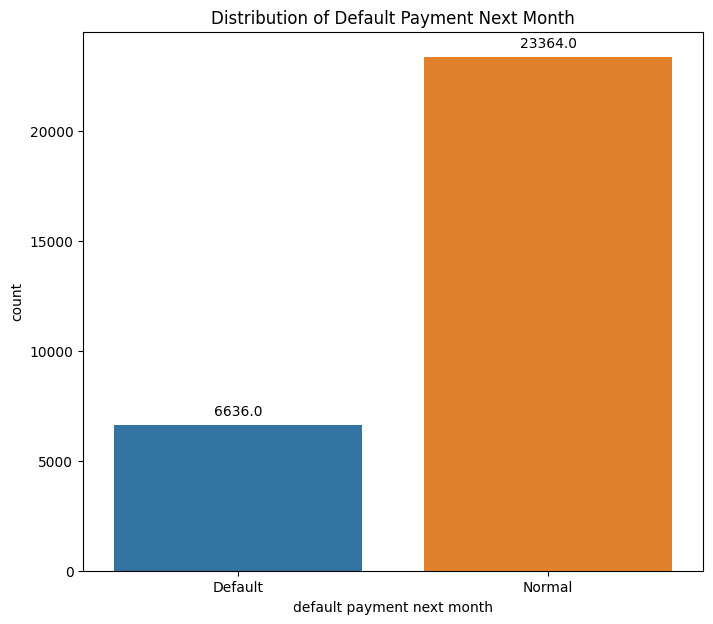

In [ ]:
default_counts = df['default payment next month'].value_counts()
df1=df.copy()
df1['default payment next month'] = df1['default payment next month'].map({0: 'Normal', 1: 'Default'})

plt.figure(figsize=(8,7))
ax = sns.countplot(x='default payment next month', data=df1, hue='default payment next month')
plt.title('Distribution of Default Payment Next Month')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')




As observed, the dataset is imbalanced, with a significantly higher number of non-default cases compared to default cases. Specifically, there are 6,636 instances of default, while the normal (non-default) category contains 23,364 data points.

Next, we will examine the distribution of the data across other categorical features such as age, marital status, sex, and education level.

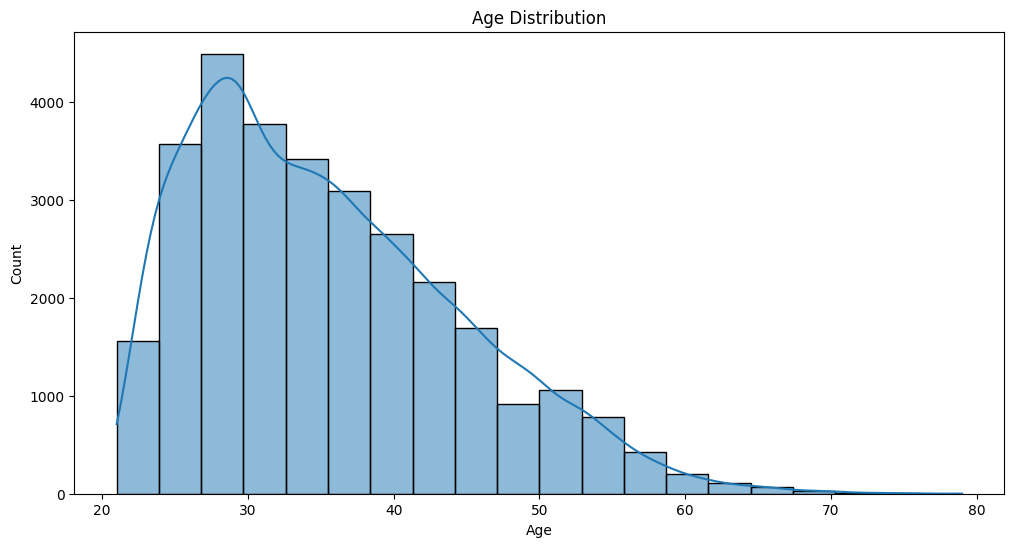

In [ ]:
age_distribution = df['AGE'].value_counts()
plt.figure(figsize=(12, 6))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

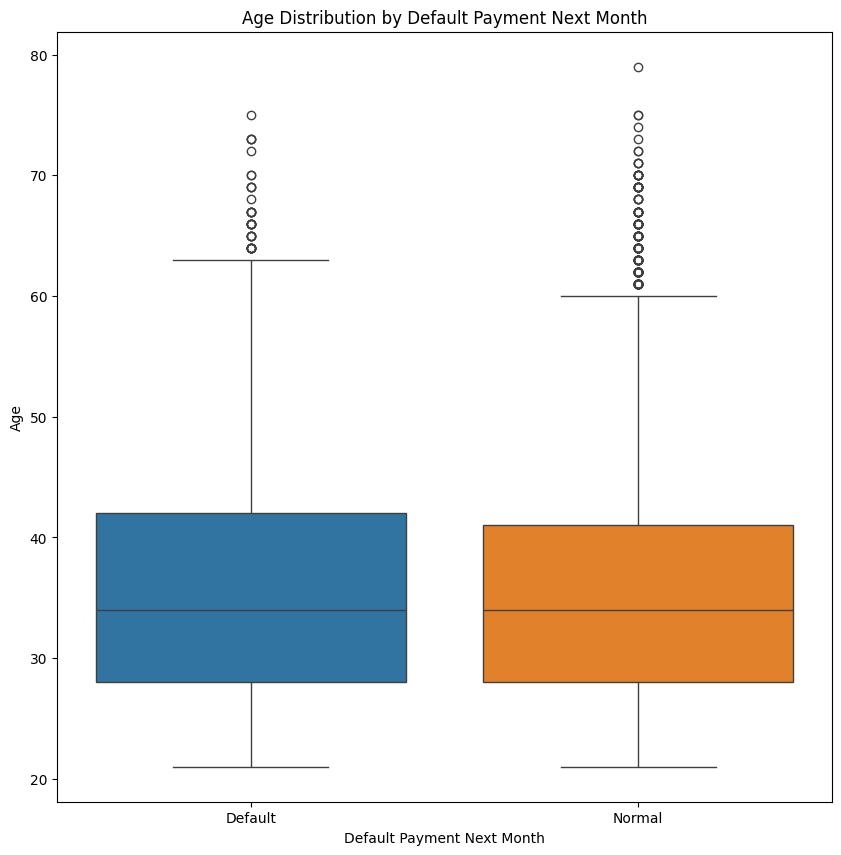

In [ ]:
df1=df.copy()
df1['default payment next month'] = df1['default payment next month'].map({0: 'Normal', 1: 'Default'})
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default payment next month", y="AGE", data=df1,hue='default payment next month')
plt.title('Age Distribution by Default Payment Next Month')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Age')
plt.show()

In [ ]:
education_distribution = df['EDUCATION'].value_counts()


The 'education' column contains categorical values with the following meanings:

1 = Graduate School

2 = University

3 = High School

4 = Others

5 = Unknown

6 = Unknown

Since categories 4, 5, and 6 lack clear definitions, they can be combined into a single category. This approach will help in simplifying the analysis and provide a clearer view of the data distribution.


In [ ]:
df['EDUCATION']=df['EDUCATION'].replace([4,5,6,0],4)
new_education_distribution=df['EDUCATION'].value_counts()
print(new_education_distribution)

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


<ipython-input-14-cbb7bfa64ed4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EDUCATION']=df['EDUCATION'].replace([4,5,6,0],4)


<Axes: xlabel='EDUCATION', ylabel='count'>

<Figure size 1000x500 with 0 Axes>

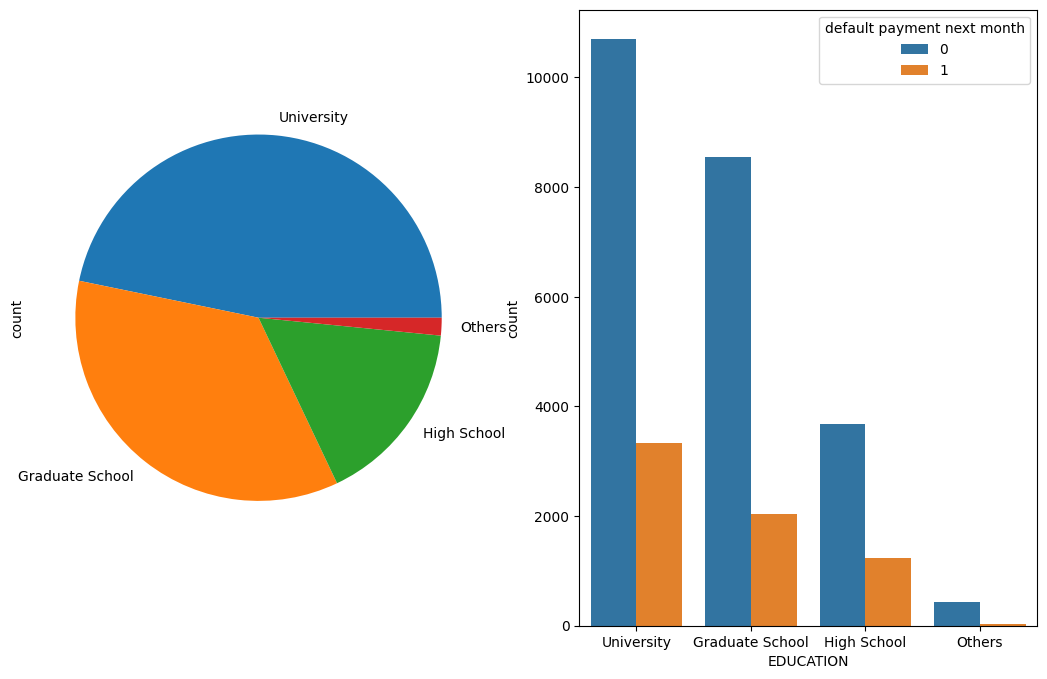

In [ ]:
plt.figure(figsize=(10,5))
df1=df.copy()
df1['EDUCATION'] = df1['EDUCATION'].map({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'})
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
df1['EDUCATION'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'EDUCATION', hue = 'default payment next month', data = df1)

Gender (1=male, 2=female)

In [ ]:
sex_distribution=df['SEX'].value_counts()

In [ ]:
print(sex_distribution)

SEX
2    18112
1    11888
Name: count, dtype: int64


<Axes: xlabel='SEX', ylabel='count'>

<Figure size 1000x500 with 0 Axes>

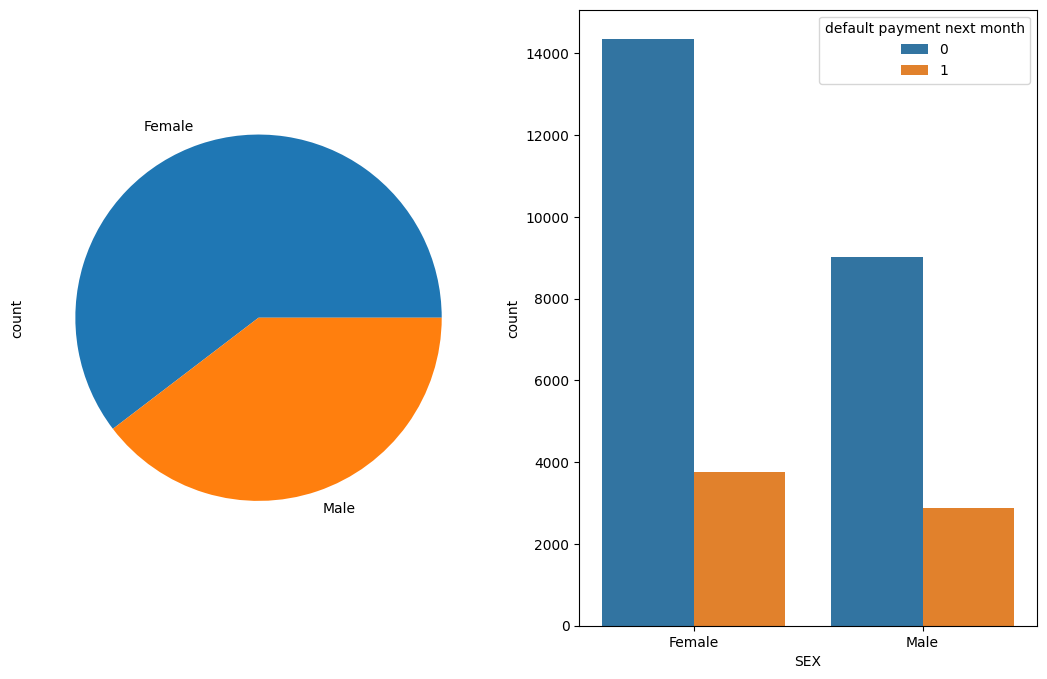

In [ ]:
plt.figure(figsize=(10,5))
df1=df.copy()
df1['SEX'] = df1['SEX'].map({1: 'Male', 2: 'Female'})
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
df1['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x ='SEX' , hue = 'default payment next month', data = df1)

Marital status (1=married, 2=single, 3=others)

In [ ]:
marriage_distribution=df['MARRIAGE'].value_counts()
print(marriage_distribution)

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


The value '0' is not explicitly defined in the dataset. Therefore, it can be treated as 'Other' for consistency and clarity in the analysis

In [ ]:
df['MARRIAGE']=df['MARRIAGE'].replace(0,3)
new_marriage_distribution=df['MARRIAGE'].value_counts()
print(new_marriage_distribution)

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64


<ipython-input-20-fd7ffd38a337>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MARRIAGE']=df['MARRIAGE'].replace(0,3)


<Axes: xlabel='MARRIAGE', ylabel='count'>

<Figure size 1000x500 with 0 Axes>

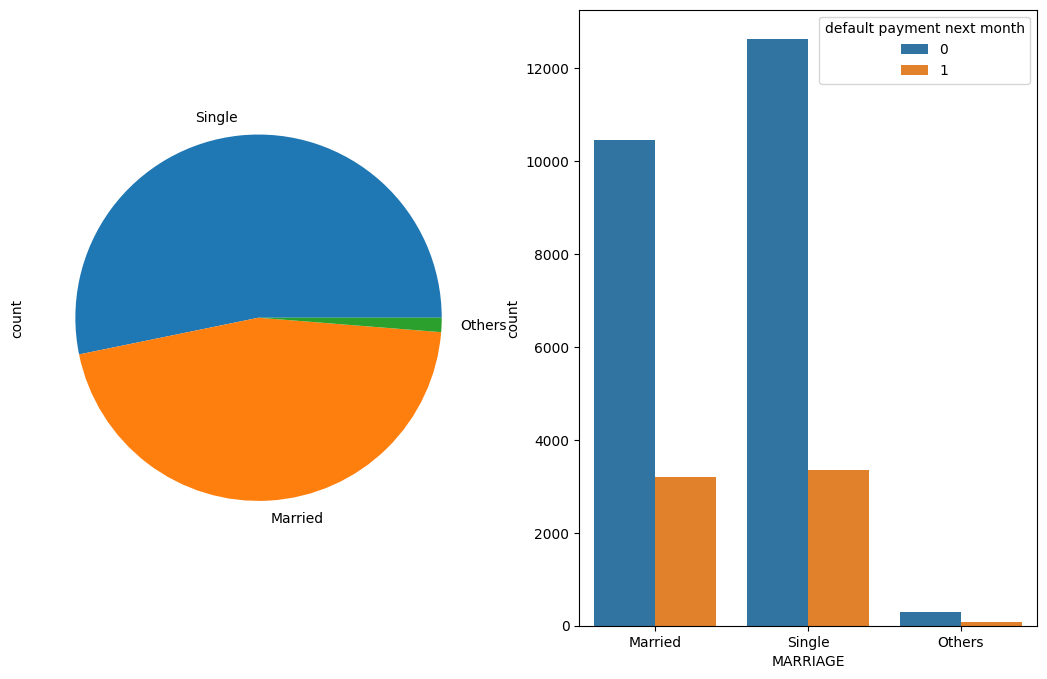

In [ ]:
plt.figure(figsize=(10,5))
df1=df.copy()
df1['MARRIAGE'] = df1['MARRIAGE'].map({1: 'Married', 2: 'Single', 3: 'Others'})
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
df1['MARRIAGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x ='MARRIAGE' , hue = 'default payment next month', data = df1)

In [ ]:
categorical_features=['SEX','EDUCATION','MARRIAGE']
numerical_features=[]
for col in df.columns:
  if col not in categorical_features:
    numerical_features.append(col)

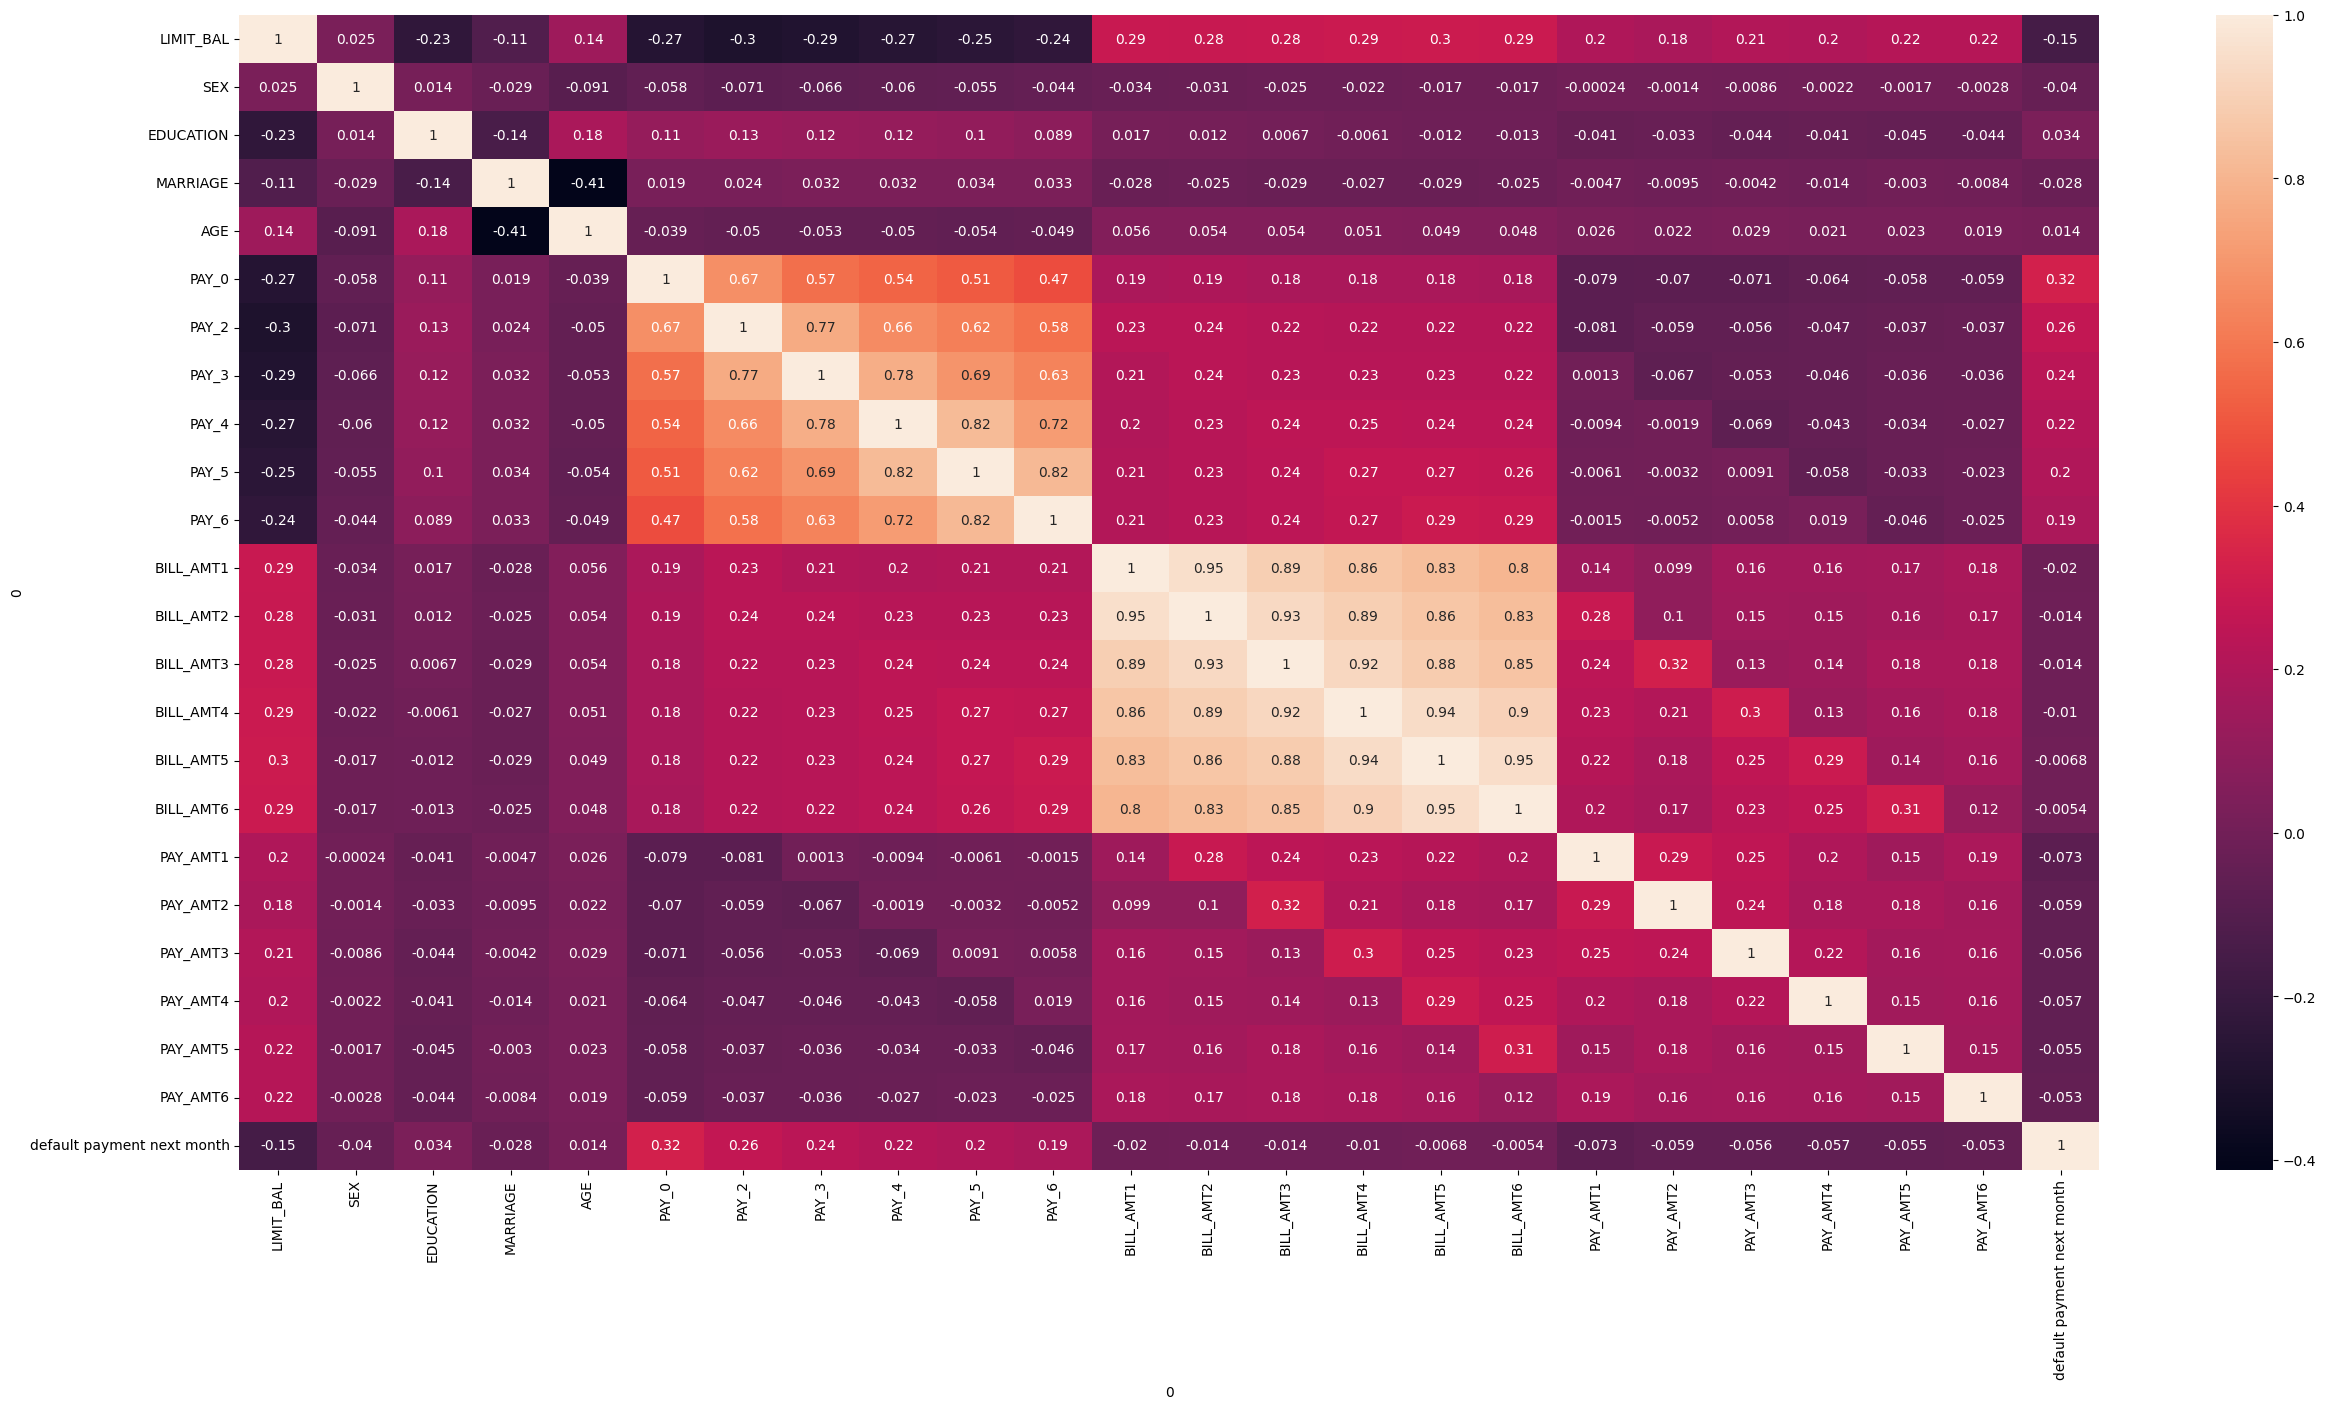

In [ ]:
plt.subplots(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

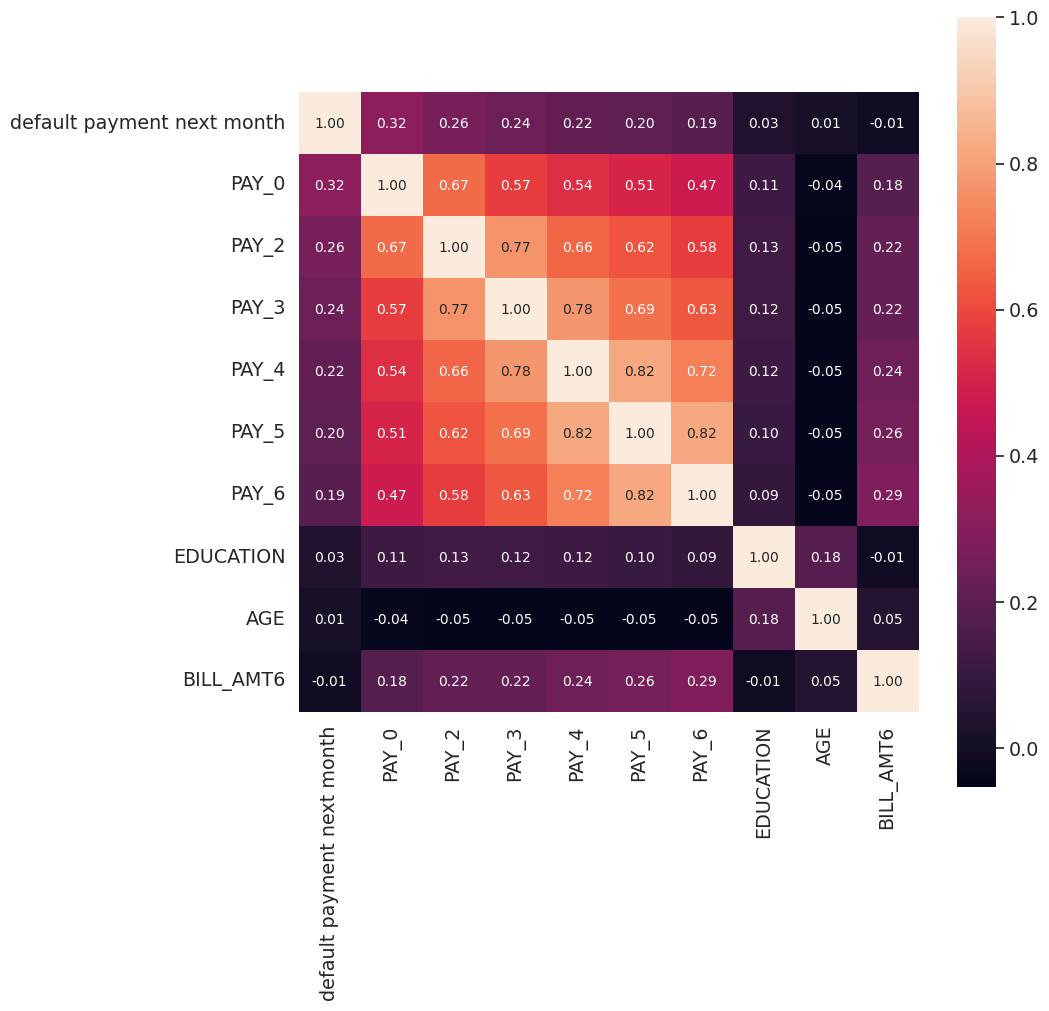

In [ ]:
k = 10
corrmat = df.corr()
cols = corrmat.nlargest(k, 'default payment next month')['default payment next month'].index

numeric_df = df[cols].apply(pd.to_numeric, errors='coerce')
numeric_df = numeric_df.dropna()
cm = np.corrcoef(numeric_df.values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Predicting next month's default risk relies heavily on the repayment history of the preceding six months. However, these repayment status features exhibit multicollinearity. To address this, we'll initially build a model using all features and then refine it by eliminating less significant variables.

The plot clearly indicates that the numerical features exhibit complex relationships with the target variable, which is whether someone defaults or not. This suggests that to build an effective model for predicting defaults based on other features, we should consider models capable of capturing such intricate interactions. Therefore, algorithms like Decision Trees or Random Forests would be well-suited for this task due to their ability to model non-linear relationships and handle feature interactions effectively.



We decided to use XGBoost for this process because it is well-suited to handle complex datasets with non-linear relationships and interactions between features, which are common in tasks like predicting credit card defaults. As part of the ensemble learning family, XGBoost builds a series of decision trees in a sequential manner, where each tree corrects the errors made by the previous one, leading to improved predictive accuracy. Its ability to capture intricate patterns, combined with built-in regularization techniques to prevent overfitting, makes it a robust choice for our dataset. Additionally, XGBoost’s high performance, scalability, and flexibility in hyperparameter tuning allow it to deliver optimal results even with large, imbalanced datasets. Therefore, XGBoost provides an excellent balance of accuracy, efficiency, and model interpretability, making it the best fit for our credit card default prediction model.



In [ ]:
df.shape

(30000, 24)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
X=df.drop('default payment next month',axis=1)
y=df['default payment next month']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.2,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [ ]:
print(X_train.shape,X_val.shape,X_test.shape)

(24000, 23) (3000, 23) (3000, 23)


To ensure that the model gives equal attention to all features and doesn't prioritize those with larger ranges, it's essential to scale the features to a common range.

There are several methods to achieve this,

Min-Max scaling, Standardization, Normalization, and Robust Scaling.

Min-Max scaling rescales the features to a fixed range, usually between 0 and 1, but can be sensitive to outliers. Standardization, on the other hand, transforms the data to have a mean of 0 and a standard deviation of 1, making it less sensitive to outliers. Normalization scales the data so that each feature has a unit norm, making it ideal for distance-based algorithms like KNN. Finally, Robust Scaling uses the median and interquartile range, making it less sensitive to outliers. The choice of method depends on the nature of the data and the model being used, but proper feature scaling ensures that all features contribute equally to the model's performance.

In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [ ]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.070707,1.0,0.333333,0.5,0.051724,0.2,0.2,0.2,0.2,0.2,...,0.129346,0.229591,0.119957,0.212270,0.004010,0.002969,0.002335,0.001961,0.003388,0.001666
1,0.020202,0.0,0.333333,0.5,0.120690,0.2,0.2,0.2,0.2,0.2,...,0.102352,0.183928,0.102464,0.178567,0.005731,0.000739,0.000950,0.001538,0.000000,0.000000
2,0.171717,1.0,1.000000,0.0,0.396552,0.2,0.2,0.1,0.1,0.1,...,0.086811,0.160138,0.087471,0.187399,0.000000,0.000505,0.000000,0.011081,0.024242,0.000345
3,0.050505,0.0,0.000000,0.5,0.068966,0.2,0.2,0.2,0.2,0.2,...,0.107501,0.197477,0.119933,0.212000,0.002310,0.001128,0.002232,0.002415,0.004455,0.003794
4,0.121212,1.0,0.333333,0.5,0.068966,0.2,0.2,0.2,0.2,0.2,...,0.149338,0.271125,0.200483,0.284403,0.004693,0.002494,0.005580,0.008052,0.011723,0.020298


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [ ]:
y_train=y_train.astype('int')
y_val=y_val.astype('int')
y_test=y_test.astype('int')


model1 =RandomForestClassifier(n_estimators=10,random_state=42, class_weight='balanced', oob_score=True)
model1.fit(X_train,y_train)
y_pred=model1.predict(X_val)
print(classification_report(y_val,y_pred))

cm=confusion_matrix(y_val,y_pred)
print(cm)



              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2351
           1       0.57      0.28      0.37       649

    accuracy                           0.80      3000
   macro avg       0.70      0.61      0.63      3000
weighted avg       0.77      0.80      0.77      3000

[[2217  134]
 [ 470  179]]


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [ ]:
model2=DecisionTreeClassifier(class_weight='balanced')
model2.fit(X_train,y_train)
y_pred=model2.predict(X_val)
print(classification_report(y_val,y_pred))

cm2=confusion_matrix(y_val,y_pred)
print(cm2)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2351
           1       0.36      0.36      0.36       649

    accuracy                           0.72      3000
   macro avg       0.59      0.59      0.59      3000
weighted avg       0.72      0.72      0.72      3000

[[1930  421]
 [ 416  233]]


In [ ]:
model3=LogisticRegression()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_val)
print(classification_report(y_val,y_pred))

cm3=confusion_matrix(y_val,y_pred)
print(cm3)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2351
           1       0.68      0.22      0.33       649

    accuracy                           0.81      3000
   macro avg       0.75      0.60      0.61      3000
weighted avg       0.79      0.81      0.77      3000

[[2285   66]
 [ 506  143]]


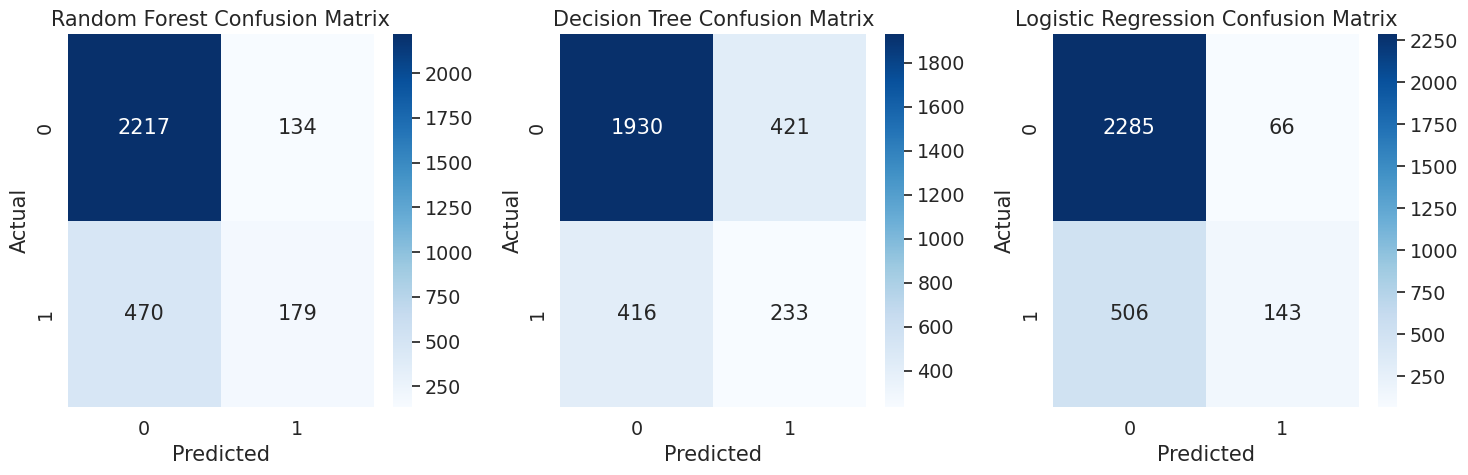

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot confusion matrix for model1 (RandomForestClassifier)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Plot confusion matrix for model2 (DecisionTreeClassifier)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Plot confusion matrix for model3 (LogisticRegression)
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Logistic Regression Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


So the model of choice is Random Forest as it provides the best cm

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      2351
           1       0.50      0.35      0.41       649

    accuracy                           0.78      3000
   macro avg       0.67      0.62      0.64      3000
weighted avg       0.76      0.78      0.77      3000

[[2125  226]
 [ 425  224]]


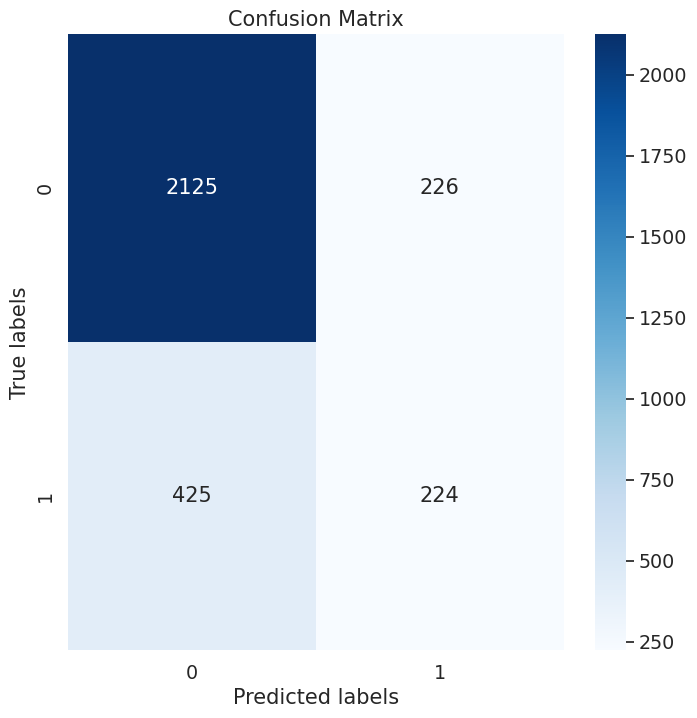

In [ ]:

threshold = 0.4

y_pred_proba = model1.predict_proba(X_val)[:, 1]

y_pred_threshold = (y_pred_proba > threshold).astype(int)


print(classification_report(y_val,y_pred_threshold))




cm=confusion_matrix(y_val,y_pred_threshold)
print(cm)
plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


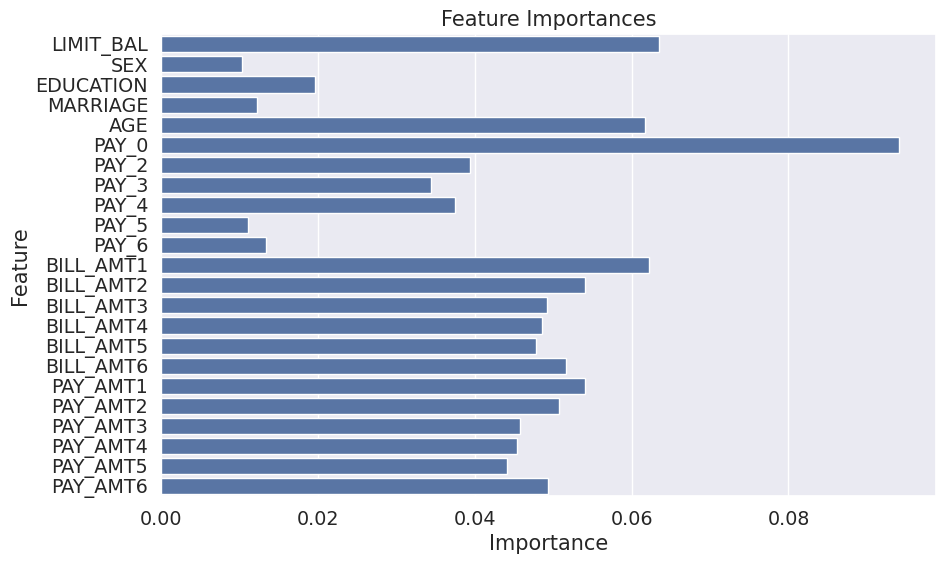

In [ ]:
feature_names=X.columns

feature_importances = model1.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
!pip install shap
import shap

In [ ]:
X_numeric = X.apply(pd.to_numeric, errors='coerce').fillna(0)

explainer = shap.TreeExplainer(model1, X_numeric)
shap_values = explainer(X_numeric)

# get just the explanations for the positive class
shap_values = shap_values

100%|===================| 59883/60000 [02:10<00:00]       

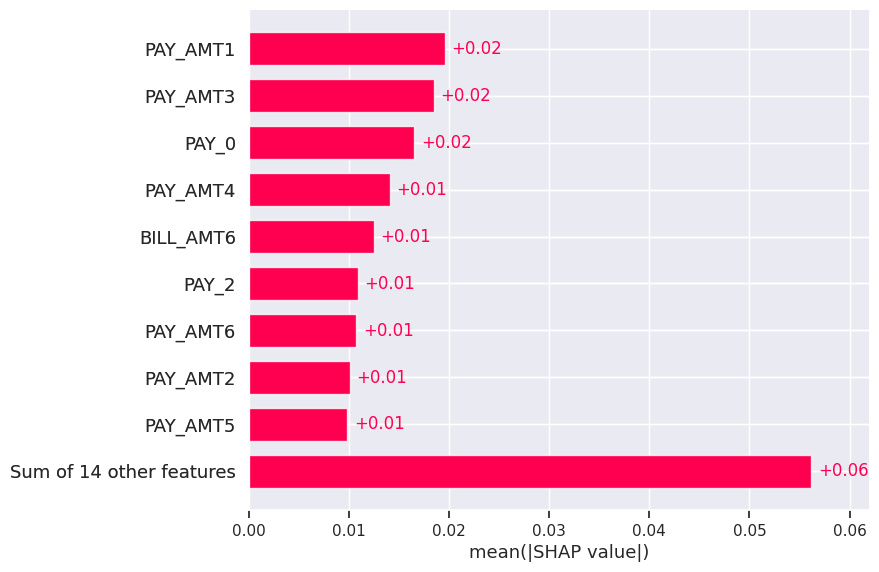

In [ ]:
shap.plots.bar(shap_values[:,:,1])